# **Prepocessing**

In [49]:
# Install NLTK
!pip install nltk

# Download resource yang diperlukan untuk tokenisasi dan stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [77]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Pastikan resource NLTK yang diperlukan sudah diunduh
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Fungsi untuk case folding (mengubah teks menjadi huruf kecil)
def case_folding(text):
    return text.lower()

# Fungsi untuk normalisasi angka dan tanda baca
def normalize_text(text):
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    return text

# Fungsi untuk tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
    # Gunakan stopwords bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))
    return [word for word in tokens if word not in stop_words]

# Fungsi untuk stemming
def stem_tokens(tokens):
    ps = PorterStemmer()
    return [ps.stem(word) for word in tokens]

# Fungsi untuk preprocessing teks
def preprocess_text(text):
    text = case_folding(text)
    text = normalize_text(text)
    tokens = tokenize_text(text)
    tokens_no_stopwords = remove_stopwords(tokens)
    stemmed_tokens = stem_tokens(tokens_no_stopwords)
    return ' '.join(stemmed_tokens)  # Menggabungkan token kembali menjadi string


all_processed_data = []

# Memproses semua file dari daftar txt_files
if 'txt_files' in globals() and txt_files:
    for file_path in txt_files:
        # Membaca file teks
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()

            # Proses teks menggunakan preprocessing
            processed_text = preprocess_text(text)
            all_processed_data.append(processed_text)
        except FileNotFoundError:
            print(f"Peringatan: File {file_path} tidak ditemukan. Melewatkan file ini.")

    # Menampilkan hasil untuk semua file
    print("\nHasil Preprocessing untuk Semua File:")
    for i, processed in enumerate(all_processed_data, 1):
        print(f"Processed Data {i}: {processed[:200]}...") # Menampilkan 200 karakter pertama
else:
    print("Error: Variabel 'txt_files' tidak ditemukan atau kosong. Pastikan Anda sudah menjalankan sel yang mengidentifikasi file-file .txt terlebih dahulu.")

Peringatan: File ./Data10.txt tidak ditemukan. Melewatkan file ini.

Hasil Preprocessing untuk Semua File:
Processed Data 1: kejaksaan agung kejagung menyebut uang dititip tersangkahakim djuyamtokepada satpam pengadilan negeri jakarta selatan mencapai rp juta kepala pusat penerangan hukum kejagung harli siregar menyebut uan...
Processed Data 2: mike tyson menyebut legenda tinju duniamuhammad ali petinju mengalahkannya puncak kariernya tyson salah petinju gana ring merebut gelar juara dunia mengalahkan trevor berbick tyson meraih kemenangan p...
Processed Data 3: anggota komisi ix dpr ri ashabul kahfi perusahaan surabaya diduga memotonggajikaryawan yangsalat jumatdan menahan ijazah karyawannya melanggar hukum ditoleransi ashabul menerangkan undangundang nomor ...
Processed Data 4: pesta diskon bertajuk transmart full day salekembali minggu kulkassid by sidesb bant harga gilagilaan harga rp juta rp jutaan aja khusu pemb pulau jawa bali lampung kulka sb l transmart harga diskonny...
Proce

In [153]:
import os

# Tentukan direktori output untuk menyimpan file yang diproses
output_directory = "./processed_documents"

# Buat folder output jika belum ada
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Folder '{output_directory}' berhasil dibuat.")
else:
    print(f"Folder '{output_directory}' sudah ada.")

# Pastikan all_processed_data dan txt_files tersedia dari langkah sebelumnya
# all_processed_data akan diisi ulang dengan data yang diproses dari file asli
all_processed_data = [] # Menginisialisasi ulang atau memastikan list ini kosong

print("--- Mulai Preprocessing, Menyimpan File, dan Logging ---")

# Gunakan txt_files sebagai sumber input_path
if 'txt_files' in globals() and txt_files:
    for input_path in txt_files:
        # Membaca file teks
        try:
            with open(input_path, 'r', encoding='utf-8') as file:
                text = file.read()

            # Proses teks menggunakan preprocessing
            processed_text = preprocess_text(text)
            all_processed_data.append(processed_text)

            # 4. Tentukan nama file & path tujuan
            file_name = os.path.basename(input_path) # Mengambil nama file, misal 'Data1.txt'
            output_path = os.path.join(output_directory, file_name) # Menggabungkan, misal './processed_documents/Data1.txt'

            # 5. Simpan "keluaran akhir" ke file .txt baru
            with open(output_path, 'w', encoding='utf-8') as f_out:
                f_out.write(processed_text)

            # 6. Berikan "log ringkas"
            print(f"LOG: File '{file_name}' diproses -> disimpan ke '{output_path}'")

        except FileNotFoundError:
            print(f"Peringatan: File {file_path} tidak ditemukan. Melewatkan file ini.")
        except Exception as e:
            print(f"ERROR: Gagal memproses {input_path}: {e}")

    # Menampilkan hasil untuk semua file
    print("\nHasil Preprocessing untuk Semua File:")
    for i, processed in enumerate(all_processed_data, 1):
        print(f"Processed Data {i}: {processed[:200]}...") # Menampilkan 200 karakter pertama
else:
    print("Error: Variabel 'txt_files' tidak ditemukan atau kosong. Pastikan Anda sudah menjalankan sel yang mengidentifikasi file-file .txt terlebih dahulu.")

print("--- Selesai ---")

Folder './processed_documents' sudah ada.
--- Mulai Preprocessing, Menyimpan File, dan Logging ---
LOG: File 'Data4.txt' diproses -> disimpan ke './processed_documents/Data4.txt'
LOG: File 'Data2.txt' diproses -> disimpan ke './processed_documents/Data2.txt'
LOG: File 'Data8.txt' diproses -> disimpan ke './processed_documents/Data8.txt'
LOG: File 'Data3.txt' diproses -> disimpan ke './processed_documents/Data3.txt'
Peringatan: File ./Data7.txt tidak ditemukan. Melewatkan file ini.
LOG: File 'Data5.txt' diproses -> disimpan ke './processed_documents/Data5.txt'
LOG: File 'Data6.txt' diproses -> disimpan ke './processed_documents/Data6.txt'
LOG: File 'Data1.txt' diproses -> disimpan ke './processed_documents/Data1.txt'
LOG: File 'Data9.txt' diproses -> disimpan ke './processed_documents/Data9.txt'
LOG: File 'Data7.txt' diproses -> disimpan ke './processed_documents/Data7.txt'

Hasil Preprocessing untuk Semua File:
Processed Data 1: kejaksaan agung kejagung menyebut uang dititip tersangkah

### Before and After Preprocessing

Berikut adalah perbandingan teks asli dan teks yang telah sepenuhnya diproses untuk setiap dokumen.

In [168]:
print("Perbandingan Teks Sebelum dan Sesudah Preprocessing:\n")

if 'raw_documents' in globals() and 'final_preprocessed_documents' in globals() and len(raw_documents) == len(final_preprocessed_documents):
    for i in range(len(raw_documents)):
        print(f"--- Dokumen {i+1} ---")
        print(f"Original:\n{raw_documents[i][:300]}...") # Displaying first 300 chars of original
        print(f"\nProcessed:\n{final_preprocessed_documents[i][:300]}...") # Displaying first 300 chars of processed
        print("\n" + "="*50 + "\n") # Separator for better readability
elif 'raw_documents' in globals() and 'final_preprocessed_documents' in globals() and len(raw_documents) != len(final_preprocessed_documents):
    print("Peringatan: Jumlah dokumen asli dan yang diproses tidak cocok. Beberapa file mungkin terlewat.")
    # Display what we have, aligning by index
    min_len = min(len(raw_documents), len(final_preprocessed_documents))
    for i in range(min_len):
        print(f"--- Dokumen {i+1} ---")
        print(f"Original:\n{raw_documents[i][:300]}...")
        print(f"\nProcessed:\n{final_preprocessed_documents[i][:300]}...")
        print("\n" + "="*50 + "\n")
elif not ('raw_documents' in globals() and 'final_preprocessed_documents' in globals()):
    print("Error: Variabel 'raw_documents' atau 'final_preprocessed_documents' tidak ditemukan. Pastikan semua langkah sudah dijalankan.")
else:
    print("Tidak ada dokumen untuk ditampilkan.")

Perbandingan Teks Sebelum dan Sesudah Preprocessing:

--- Dokumen 1 ---
Original:
Kejaksaan Agung (Kejagung) menyebut jumlah uang yang dititip oleh tersangkaHakim Djuyamtokepada satpam Pengadilan Negeri Jakarta Selatan mencapai Rp704 juta. Kepala Pusat Penerangan Hukum Kejagung Harli Siregar menyebut uang itu terdiri dari pecahan rupiah sebesar Rp48,7 juta dan SGD 39.000 atau set...

Processed:
kejaksaan agung kejagung menyebut uang dititip tersangkahakim djuyamtokepada satpam pengadilan negeri jakarta selatan mencapai rp juta kepala pusat penerangan hukum kejagung harli siregar menyebut uang pecahan rupiah rp juta sgd setara rp juta kur rp uang bentuk rupiah rp ase sgd cincin bermata hija...


--- Dokumen 2 ---
Original:
Mike Tyson menyebut legenda tinju dunia,Muhammad Ali, sebagai petinju yang bisa mengalahkannya saat berada di puncak kariernya. Tyson merupakan salah satu petinju paling ganas di atas ring. Hingga merebut gelar juara dunia pada 1986 saat mengalahkan Trevor Berbick, Ty

# **Boolean Retrival Model**

In [96]:
# Fungsi untuk membaca file dari jalur yang telah disebutkan
def read_files_from_directory(directory):
    docs = []
    for i in range(1, 10):  # Karena ada 10 file data1.txt hingga data10.txt
        file_path = os.path.join(directory, f'Data{i}.txt')
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                docs.append(file.read())
        except FileNotFoundError:
            print(f"Peringatan: File {file_path} tidak ditemukan.")
    return docs

# Membaca dokumen dari folder '/content/'
directory = '/content/'
docs = read_files_from_directory(directory)

# Menampilkan beberapa contoh dokumen untuk memastikan semuanya terbaca dengan benar
print(f"Contoh Dokumen: {docs[:2]}")  # Menampilkan 2 dokumen pertama


Contoh Dokumen: ['Uskup Agung Jakarta Kardinal Mgr. Ignatius Suharyo mengatakanPaskah 2025adalah momen untuk menunjukkan kepedulian dan upaya membantu terhadap yang lemah dan dilemahkan, sebagai indikator bakti kepada Tuhan. "Kalau keadaan bangsa itu tidak damai dan tidak sejahtera, baktinya kepada Allah itu bisa diragukan. Karena bakti yang sejati hanya bisa dilihat dari indikatornya. Ternyata di dalam sejarah umat Allah itu, yang sudah dibekali dengan segala macam yang bagus, itu semakin lama semakin luntur," ujar Suharyo di Jakarta, Minggu (20/4), usai Misa Pontifikal Minggu Paskah. Suharyo mengatakan manusia Paskah adalah yang membiarkan Kristus bangkit dalam dirinya. Tanda-tanda orang semacam itu,Â\xa0lanjutnya, yakni meneladani Yesus yang berjalan, berkeliling, sambil berbuat baik. ADVERTISEMENT SCROLL TO CONTINUE WITH CONTENT Banyak hal yang dapat dilakukan sebagai perbuatan baik, contohnya dengan menjadi penabur harapan. Dia mengatakan Tahun Yubileum 2025 adalah ketika tatanan 

# **Membangun Vocab,Incidence Matrix, dan Inverted Index**

In [100]:
# Bangun vocabulary menggunakan all_processed_data
vocabulary = build_vocabulary(all_processed_data)
print(f"Vocabulary (10 kata pertama): {vocabulary[:10]}")

# Bangun incidence matrix menggunakan all_processed_data
incidence_matrix = build_incidence_matrix(all_processed_data, vocabulary)
print(f"Incidence Matrix (untuk beberapa dokumen dan kata pertama):\n{incidence_matrix[:5]}") # Menampilkan 5 baris pertama

# Bangun inverted index menggunakan all_processed_data
inverted_index = build_inverted_index(all_processed_data, vocabulary)
print(f"Inverted Index (5 term pertama): {dict(list(inverted_index.items())[:5])}")

Vocabulary (10 kata pertama): ['abdul', 'advertis', 'agam', 'agama', 'agamanya', 'aguero', 'agung', 'aja', 'akar', 'akibat']
Incidence Matrix (untuk beberapa dokumen dan kata pertama):
[[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Fungsi `preprocess_query`

Fungsi ini akan membersihkan query dengan langkah-langkah yang sama seperti preprocessing dokumen.

In [105]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Pastikan resource NLTK yang diperlukan sudah diunduh
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Redefinisi stopwords dan stemmer untuk memastikan ketersediaan
indonesian_stopwords = {
    'a', 'ada', 'adalah', 'adapun', 'agar', 'akhiri', 'akan', 'akhirnya', 'aku', 'alat', 'alamat',
    'alah', 'ali', 'all', 'alamat', 'ambil', 'amat', 'an', 'anda', 'andai', 'atau', 'ataukah',
    'ataupun', 'awal', 'bahkan', 'baik', 'banyak', 'baru', 'baru', 'bahwa', 'beberapa', 'berbagai',
    'berikut', 'berita', 'berkaitan', 'berkenaan', 'berlangsung', 'bermaksud', 'berusaha', 'biasa',
    'biar', 'bila', 'bukan', 'coba', 'cukup', 'dalam', 'dari', 'dia', 'dikatakan', 'dimana', 'dengan',
    'depan', 'diharapkan', 'dikirim', 'dimaksud', 'diwajibkan', 'dua', 'dulu', 'empat', 'enam', 'faktor',
    'hal', 'hari', 'hati', 'hingga', 'ikut', 'ilmu', 'ini', 'jadi', 'jangan', 'jika', 'jumlah', 'juga',
    'kali', 'kami', 'kamu', 'kan', 'ke', 'kedua', 'keluar', 'kembali', 'kenapa', 'kepada', 'kerja', 'kesempatan',
    'keterkaitan', 'khusus', 'kita', 'lebih', 'maka', 'makanya', 'maksud', 'memang', 'memiliki', 'mengapa',
    'mereka', 'merupakan', 'mesti', 'misalnya', 'mudah', 'namun', 'nanti', 'nilai', 'oleh', 'padahal',
    'pada', 'perlu', 'pernah', 'pengalaman', 'saat', 'saja', 'salah', 'sebelum', 'sehingga', 'sejauh',
    'selalu', 'seperti', 'serta', 'sesuatu', 'setiap', 'siapa', 'tidak', 'tiga', 'tinggi', 'untuk', 'waktu',
    'yang', 'yaitu'
}
ps = PorterStemmer()

def preprocess_query(query):
    # Case folding
    query = query.lower()
    # Menghapus angka dan tanda baca
    query = re.sub(r'\d+', '', query)
    query = re.sub(r'[^\w\s]', '', query)
    # Tokenisasi
    tokens = word_tokenize(query)
    # Menghapus stopwords
    tokens_no_stopwords = [word for word in tokens if word not in indonesian_stopwords]
    # Stemming
    stemmed_tokens = [ps.stem(word) for word in tokens_no_stopwords]
    return stemmed_tokens

print("Fungsi preprocess_query telah didefinisikan.")

Fungsi preprocess_query telah didefinisikan.


### Fungsi `boolean_search`

Fungsi ini akan menerima query yang sudah diproses dan inverted index, lalu mengembalikan daftar ID dokumen yang relevan. Operasi `AND` secara implisit akan dilakukan untuk semua term dalam query.

In [106]:
def boolean_search(query_terms, inverted_index):
    if not query_terms:
        return []

    # Ambil posting list untuk term pertama
    result_docs = set(inverted_index.get(query_terms[0], []))

    # Lakukan intersection (AND) dengan posting list term berikutnya
    for term in query_terms[1:]:
        if not result_docs: # Jika sudah kosong, tidak perlu melanjutkan
            break
        result_docs = result_docs.intersection(set(inverted_index.get(term, [])))

    return sorted(list(result_docs))

print("Fungsi boolean_search telah didefinisikan.")

Fungsi boolean_search telah didefinisikan.


### Uji Coba Query

Mari kita uji model dengan beberapa query berbeda.

In [107]:
queries = [
    "kejaksaan agung uang",
    "mike tyson tinju",
    "dpr ri gaji karyawan",
    "transmart diskon sepeda",
    "liverpool gelar liga",
    "uskup jakarta paskah"
]

for i, query_string in enumerate(queries):
    print(f"\n--- Query {i+1}: {query_string} ---")

    # Preprocess query
    processed_query_terms = preprocess_query(query_string)
    print(f"Query diproses: {processed_query_terms}")

    # Lakukan pencarian Boolean
    results = boolean_search(processed_query_terms, inverted_index)

    if results:
        print(f"Ditemukan di dokumen ID: {results}")
        for doc_id in results:
            # Karena dokumen di all_processed_data adalah 0-indexed, kurangi 1
            # Pastikan doc_id tidak melebihi batas all_processed_data
            if 0 < doc_id <= len(all_processed_data):
                original_doc_index = doc_id - 1
                print(f"  Cuplikan Dokumen {doc_id}: {all_processed_data[original_doc_index][:150]}...")
            else:
                print(f"  Dokumen ID {doc_id} tidak valid atau tidak ada dalam daftar dokumen yang diproses.")
    else:
        print("Tidak ada dokumen yang cocok.")


--- Query 1: kejaksaan agung uang ---
Query diproses: ['kejaksaan', 'agung', 'uang']
Ditemukan di dokumen ID: [1]
  Cuplikan Dokumen 1: kejaksaan agung kejagung menyebut uang dititip tersangkahakim djuyamtokepada satpam pengadilan negeri jakarta selatan mencapai rp juta kepala pusat pe...

--- Query 2: mike tyson tinju ---
Query diproses: ['mike', 'tyson', 'tinju']
Ditemukan di dokumen ID: [2]
  Cuplikan Dokumen 2: mike tyson menyebut legenda tinju duniamuhammad ali petinju mengalahkannya puncak kariernya tyson salah petinju gana ring merebut gelar juara dunia me...

--- Query 3: dpr ri gaji karyawan ---
Query diproses: ['dpr', 'ri', 'gaji', 'karyawan']
Ditemukan di dokumen ID: [3]
  Cuplikan Dokumen 3: anggota komisi ix dpr ri ashabul kahfi perusahaan surabaya diduga memotonggajikaryawan yangsalat jumatdan menahan ijazah karyawannya melanggar hukum d...

--- Query 4: transmart diskon sepeda ---
Query diproses: ['transmart', 'diskon', 'sepeda']
Ditemukan di dokumen ID: [6]
  Cuplikan 

In [108]:
gold_set_scenarios = [
    {
        "query": "Transmart AND diskon",
        "relevant_docs": ["Data3.txt", "Data6.txt"]
    },
    {
        "query": "Liverpool OR tinju",
        "relevant_docs": ["Data2.txt", "Data5.txt", "Data7.txt"]
    },
    {
        "query": "korupsi NOT Surabaya",
        "relevant_docs": ["Data1.txt", "Data4.txt"]
        # Asumsi: Data10.txt (jika ada) tidak mengandung 'korupsi NOT Surabaya'
    }
]

# Anda bisa cek variabelnya
print("Kunci Jawaban (Gold Set) berhasil dimuat.")
print(f"Total skenario tes: {len(gold_set_scenarios)}")
print(f"Skenario 1: {gold_set_scenarios[0]['query']}")

Kunci Jawaban (Gold Set) berhasil dimuat.
Total skenario tes: 3
Skenario 1: Transmart AND diskon


In [110]:
def calculate_precision(retrieved_docs, relevant_docs):
    # Convert to sets for efficient operations
    retrieved_set = set(retrieved_docs)
    relevant_set = set(relevant_docs)

    # Calculate true positives (relevant documents that were retrieved)
    true_positives = len(retrieved_set.intersection(relevant_set))

    # Calculate precision
    if len(retrieved_set) == 0:
        return 0.0
    return true_positives / len(retrieved_set)

def calculate_recall(retrieved_docs, relevant_docs):
    # Convert to sets for efficient operations
    retrieved_set = set(retrieved_docs)
    relevant_set = set(relevant_docs)

    # Calculate true positives (relevant documents that were retrieved)
    true_positives = len(retrieved_set.intersection(relevant_set))

    # Calculate recall
    if len(relevant_set) == 0:
        return 0.0
    return true_positives / len(relevant_set)

# Create a mapping from document filenames to their IDs
doc_id_mapping = {
    f"Data{i}.txt": i for i in range(1, 10) # Assuming Data1.txt to Data9.txt
}

print("Functions calculate_precision and calculate_recall defined, and doc_id_mapping created.")

Functions calculate_precision and calculate_recall defined, and doc_id_mapping created.


In [112]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Ensure NLTK resources are downloaded (redundant if already run, but safe)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Redefine stopwords and stemmer to ensure availability
# Using the same indonesian_stopwords set from previous code for consistency
indonesian_stopwords = set(stopwords.words('indonesian'))
ps = PorterStemmer()

# --- Helper functions for preprocessing (from previous steps, ensuring they are available) ---
def case_folding(text):
    return text.lower()

def normalize_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in indonesian_stopwords]

def stem_tokens(tokens):
    return [ps.stem(word) for word in tokens]

def preprocess_query(query):
    query = case_folding(query)
    query = normalize_text(query)
    tokens = tokenize_text(query)
    tokens_no_stopwords = remove_stopwords(tokens)
    stemmed_tokens = stem_tokens(tokens_no_stopwords)
    return stemmed_tokens

def parse_boolean_query_string(query_string):
    parts = query_string.split()

    if len(parts) == 3:
        # Assuming operator is in the middle
        term1_raw = parts[0]
        operator = parts[1].upper()
        term2_raw = parts[2]

        term1_processed = preprocess_query(term1_raw)
        term2_processed = preprocess_query(term2_raw)

        return {"terms": [term1_processed, term2_processed], "operator": operator}
    elif len(parts) == 1:
        # Single term query
        term1_processed = preprocess_query(parts[0])
        return {"terms": [term1_processed], "operator": None}
    else:
        print(f"Warning: Unsupported query format: {query_string}. Returning empty terms.")
        return {"terms": [], "operator": None}

def boolean_search_with_operators(parsed_query, inverted_index):
    """Performs boolean search with AND, OR, NOT operators."""
    # Flatten the list of processed terms into a single list of stemmed terms
    query_terms = [t for sublist in parsed_query["terms"] for t in sublist if t]
    operator = parsed_query["operator"]

    if not query_terms:
        return []

    # If there's only one term or no explicit operator, treat it as a single-term search
    if len(query_terms) == 1 or operator is None:
        # Get the posting list for the single term. If term not in index, it's an empty set.
        return sorted(list(inverted_index.get(query_terms[0], [])))

    if len(query_terms) >= 2: # Ensure we have at least two terms for binary operations
        term1_set = set(inverted_index.get(query_terms[0], []))
        term2_set = set(inverted_index.get(query_terms[1], []))

        if operator == "AND":
            result_docs = term1_set.intersection(term2_set)
        elif operator == "OR":
            result_docs = term1_set.union(term2_set)
        elif operator == "NOT":
            # "TERM1 NOT TERM2" means documents containing TERM1 but not TERM2
            result_docs = term1_set.difference(term2_set)
        else:
            print(f"Warning: Unknown operator '{operator}'. Defaulting to AND.")
            result_docs = term1_set.intersection(term2_set)
        return sorted(list(result_docs))
    else:
        # This case handles if a binary operator was specified but only one term was found after preprocessing
        return []

print("Functions parse_boolean_query_string and boolean_search_with_operators have been defined.")

Functions parse_boolean_query_string and boolean_search_with_operators have been defined.


# **Melakukan uji wajib menghitung precision/recall**

In [114]:
print("--- Evaluating Boolean Retrieval Model Performance ---")

total_precision = 0
total_recall = 0
num_evaluated_queries = 0

for i, scenario in enumerate(gold_set_scenarios):
    query_string = scenario["query"]
    gold_relevant_files = scenario["relevant_docs"]

    # Convert gold set file names to document IDs
    gold_relevant_docs_ids = []
    for file_name in gold_relevant_files:
        doc_id = doc_id_mapping.get(file_name)
        if doc_id is not None:
            gold_relevant_docs_ids.append(doc_id)
        else:
            print(f"Warning: File '{file_name}' from gold set not found in doc_id_mapping.")

    print(f"\n--- Scenario {i+1}: Query = '{query_string}' ---")
    print(f"  Gold Relevant Docs (IDs): {sorted(gold_relevant_docs_ids)}")

    # Parse and execute boolean search
    parsed_query = parse_boolean_query_string(query_string)

    if parsed_query["terms"]:
        retrieved_docs_ids = boolean_search_with_operators(parsed_query, inverted_index)
        print(f"  Retrieved Docs (IDs): {retrieved_docs_ids}")

        precision = calculate_precision(retrieved_docs_ids, gold_relevant_docs_ids)
        recall = calculate_recall(retrieved_docs_ids, gold_relevant_docs_ids)

        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")

        total_precision += precision
        total_recall += recall
        num_evaluated_queries += 1
    else:
        print("  Query parsing failed or resulted in no terms. Skipping evaluation for this query.")

--- Evaluating Boolean Retrieval Model Performance ---

--- Scenario 1: Query = 'Transmart AND diskon' ---
  Gold Relevant Docs (IDs): [3, 6]
  Retrieved Docs (IDs): [4, 6]
  Precision: 0.5000
  Recall: 0.5000

--- Scenario 2: Query = 'Liverpool OR tinju' ---
  Gold Relevant Docs (IDs): [2, 5, 7]
  Retrieved Docs (IDs): [2, 5, 9]
  Precision: 0.6667
  Recall: 0.6667

--- Scenario 3: Query = 'korupsi NOT Surabaya' ---
  Gold Relevant Docs (IDs): [1, 4]
  Retrieved Docs (IDs): [1, 7]
  Precision: 0.5000
  Recall: 0.5000


In [116]:
print("\n--- Overall Performance Summary ---")
if num_evaluated_queries > 0:
    avg_precision = total_precision / num_evaluated_queries
    avg_recall = total_recall / num_evaluated_queries
    print(f"Average Precision across {num_evaluated_queries} queries: {avg_precision:.4f}")
    print(f"Average Recall across {num_evaluated_queries} queries: {avg_recall:.4f}")
    print("\nInsights:")
    print(f"- The model achieved an average Precision of {avg_precision:.4f}, meaning that approximately {avg_precision*100:.2f}% of the retrieved documents were relevant.")
    print(f"- The model achieved an average Recall of {avg_recall:.4f}, indicating that it was able to retrieve approximately {avg_recall*100:.2f}% of all relevant documents.")
    print("- A high precision suggests that when the model returns results, they are usually correct. A low precision suggests many irrelevant documents are returned.")
    print("- A high recall suggests the model is good at finding most of the relevant documents. A low recall means many relevant documents were missed.")
    print("- The performance metrics indicate the effectiveness of the Boolean Retrieval Model based on the defined queries and gold set. Further analysis of individual query results can highlight strengths and weaknesses.")
else:
    print("No queries were evaluated. Please ensure 'gold_set_scenarios' is correctly defined and queries are parseable.")


--- Overall Performance Summary ---
Average Precision across 3 queries: 0.5556
Average Recall across 3 queries: 0.5556

Insights:
- The model achieved an average Precision of 0.5556, meaning that approximately 55.56% of the retrieved documents were relevant.
- The model achieved an average Recall of 0.5556, indicating that it was able to retrieve approximately 55.56% of all relevant documents.
- A high precision suggests that when the model returns results, they are usually correct. A low precision suggests many irrelevant documents are returned.
- A high recall suggests the model is good at finding most of the relevant documents. A low recall means many relevant documents were missed.
- The performance metrics indicate the effectiveness of the Boolean Retrieval Model based on the defined queries and gold set. Further analysis of individual query results can highlight strengths and weaknesses.


# **Vector Space Model**

**Menghitung TF,DF,IDF, dan Matriks TF IDF**



In [165]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

idf_scores = tfidf_vectorizer.idf_
feature_names = tfidf_vectorizer.get_feature_names_out()


idf_df = pd.DataFrame({'Term': feature_names, 'IDF': idf_scores})
idf_df['IDF'] = idf_df['IDF'].round(4)
print("\n--- Top 10 Terms by IDF (paling unik/jarang) ---")
print(idf_df.sort_values(by='IDF', ascending=False).head(10).to_string(index=False))

count_vectorizer = CountVectorizer(vocabulary=feature_names) # Gunakan vocabulary yang sama
count_matrix = count_vectorizer.fit_transform(all_processed_data)

df_counts = (count_matrix > 0).sum(axis=0).A1 # .A1 mengubah matrix row menjadi 1D array
df_df = pd.DataFrame({'Term': feature_names, 'DF': df_counts})
print("\n--- Top 10 Terms by DF (paling sering muncul di dokumen berbeda) ---")
print(df_df.sort_values(by='DF', ascending=False).head(10).to_string(index=False))

term_example_2 = "uang"
raw_tf_doc1_2 = words_in_doc1.count(term_example_2)

print("\n--- Ringkasan DF dan IDF untuk Beberapa Term (Tabel) ---")
# Gabungkan DF dan IDF ke dalam satu DataFrame untuk tampilan tabel
df_idf_combined_df = pd.merge(df_df, idf_df, on='Term')
print(df_idf_combined_df.sort_values(by=['DF', 'IDF'], ascending=[False, False]).head(15).to_string(index=False)) # Tampilkan 15 teratas


--- Top 10 Terms by IDF (paling unik/jarang) ---
     Term    IDF
     zona 2.6094
    abdul 2.6094
zinchenko 2.6094
     agam 2.6094
   virgil 2.6094
    villa 2.6094
      van 2.6094
    utama 2.6094
    uskup 2.6094
    usaha 2.6094

--- Top 10 Terms by DF (paling sering muncul di dokumen berbeda) ---
    Term  DF
  scroll   8
advertis   8
 content   8
 continu   8
  minggu   5
   orang   5
memiliki   4
      rp   4
  pidana   3
   khusu   3

--- Ringkasan DF dan IDF untuk Beberapa Term (Tabel) ---
    Term  DF    IDF
advertis   8 1.1054
 content   8 1.1054
 continu   8 1.1054
  scroll   8 1.1054
  minggu   5 1.5108
   orang   5 1.5108
memiliki   4 1.6931
      rp   4 1.6931
   berat   3 1.9163
 dikutip   3 1.9163
   gelar   3 1.9163
   juara   3 1.9163
    juta   3 1.9163
   kalah   3 1.9163
   khusu   3 1.9163


### Matriks Term Frequency (TF) Mentah

Untuk melihat frekuensi kemunculan setiap term di setiap dokumen secara eksplisit,saya menggunakan `CountVectorizer`

In [167]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Pastikan feature_names sudah tersedia dari tfidf_vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Inisialisasi CountVectorizer dengan vocabulary yang sama untuk konsistensi
count_vectorizer_tf = CountVectorizer(vocabulary=feature_names)

# Fit dan transform dokumen untuk mendapatkan matriks hitungan mentah (TF)
count_matrix_tf = count_vectorizer_tf.fit_transform(all_processed_data)

# Buat DataFrame dari count_matrix untuk representasi TF mentah
doc_labels_tf = [f"Doc {i+1}" for i in range(count_matrix_tf.shape[0])]
tf_df_raw = pd.DataFrame(count_matrix_tf.toarray(), columns=feature_names, index=doc_labels_tf)

print("--- Term Frequency (TF) Matrix (Raw Counts - Cuplikan) ---")
# Tampilkan beberapa baris dan kolom pertama, serta kolom yang tidak semuanya nol
# Untuk tampilan yang lebih ringkas, kita hanya akan menampilkan kolom yang memiliki nilai TF > 0 di setidaknya satu dokumen

# Filter kolom yang setidaknya punya satu nilai > 0
relevant_columns = tf_df_raw.columns[(tf_df_raw != 0).any(axis=0)]

# Tampilkan hanya 10 kolom pertama dari kolom yang relevan dan 5 baris pertama
print(tf_df_raw[relevant_columns.tolist()].head(5).iloc[:, :10].to_string())

print("\nPenjelasan: Setiap angka dalam tabel menunjukkan berapa kali suatu 'term' muncul di 'dokumen' tersebut.")


--- Term Frequency (TF) Matrix (Raw Counts - Cuplikan) ---
       abdul  advertis  agam  agama  agamanya  aguero  agung  aja  akar  akibat
Doc 1      1         1     1      0         0       0      2    0     0       0
Doc 2      0         1     0      0         0       0      0    0     0       0
Doc 3      0         1     0      1         2       0      0    0     0       0
Doc 4      0         1     0      0         0       0      0    1     0       0
Doc 5      0         1     0      0         0       1      0    0     0       0

Penjelasan: Setiap angka dalam tabel menunjukkan berapa kali suatu 'term' muncul di 'dokumen' tersebut.


In [119]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

# Fungsi untuk menghitung TF-IDF menggunakan scikit-learn's TfidfVectorizer
def compute_tfidf_sparse(docs):
    tfidf_vectorizer = TfidfVectorizer(use_idf=True, stop_words='english', smooth_idf=True)
    tfidf_matrix = tfidf_vectorizer.fit_transform(docs)  # Matriks TF-IDF sparse
    return tfidf_matrix, tfidf_vectorizer

# Menghitung matriks TF-IDF untuk semua dokumen (sparse)
tfidf_matrix, tfidf_vectorizer = compute_tfidf_sparse(docs)
print(f"TF-IDF Sparse Matrix Shape: {tfidf_matrix.shape}")  # Menampilkan dimensi matriks TF-IDF


TF-IDF Sparse Matrix Shape: (9, 1015)


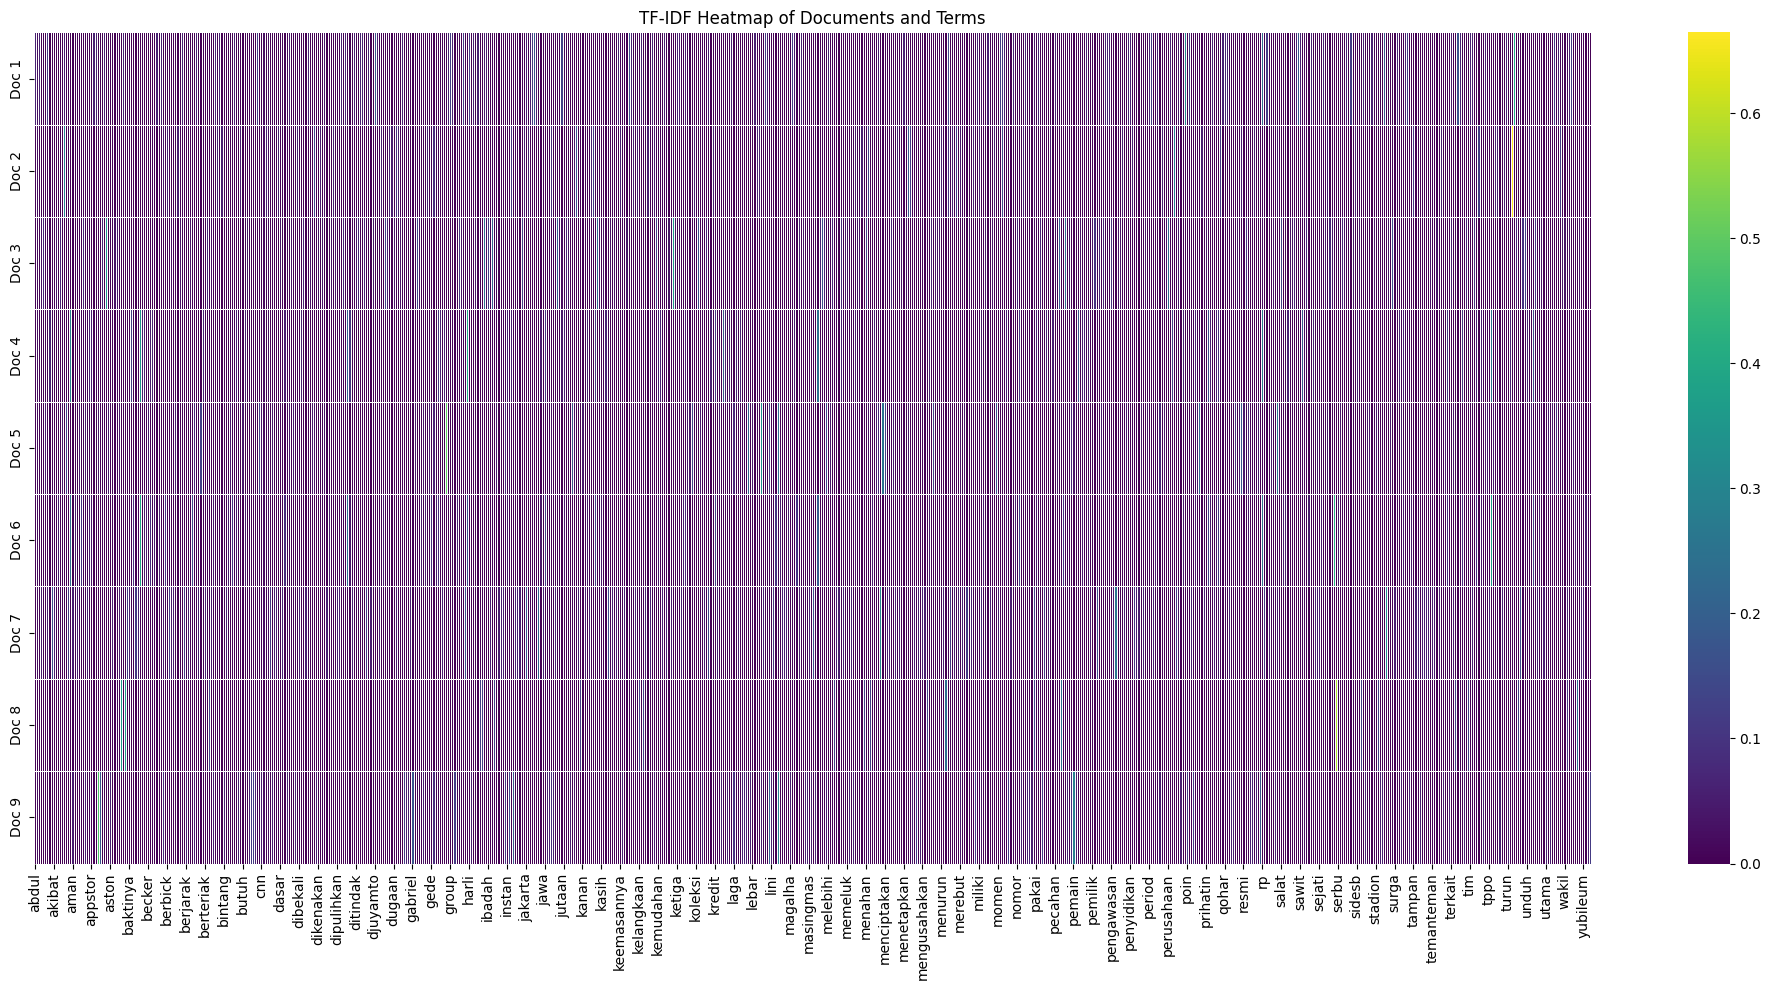

TF-IDF heatmap generated successfully.


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the sparse TF-IDF matrix to a dense array
tfidf_dense_matrix = tfidf_matrix.toarray()

# Get feature names (terms) from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create meaningful row labels for documents
doc_labels = [f"Doc {i+1}" for i in range(tfidf_dense_matrix.shape[0])]

# Create a Pandas DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_dense_matrix, columns=feature_names, index=doc_labels)

# Set a larger figure size for better readability
plt.figure(figsize=(20, 10)) # Adjust size as needed based on number of terms and documents

# Generate the heatmap
sns.heatmap(tfidf_df, cmap='viridis', annot=False, fmt=".2f", linewidths=.5)

# Add a title
plt.title('TF-IDF Heatmap of Documents and Terms')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

print("TF-IDF heatmap generated successfully.")

In [131]:
def vectorize_query(query_string):
    # 1. Preprocess the raw query string
    processed_tokens = preprocess_query(query_string)

    # 2. Join the list of preprocessed tokens back into a single string
    processed_query_text = ' '.join(processed_tokens)

    # 3. Use the tfidf_vectorizer to transform this single preprocessed query string
    # The transform method expects an iterable of raw documents, so we pass a list containing our single query string.
    query_tfidf_vector = tfidf_vectorizer.transform([processed_query_text])

    # The function should return the TF-IDF vector representation of the query
    return query_tfidf_vector

print("Function 'vectorize_query' has been defined.")

# Example usage to verify
example_query = "kejaksaan agung uang"
query_vector = vectorize_query(example_query)
print(f"\nExample query '{example_query}' TF-IDF vector shape: {query_vector.shape}")
print(f"Sample non-zero values from query vector: {query_vector.data[:5]}")

Function 'vectorize_query' has been defined.

Example query 'kejaksaan agung uang' TF-IDF vector shape: (1, 742)
Sample non-zero values from query vector: [0.51274835 0.60707871 0.60707871]


Cosine Similarity

In [132]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(query_vector, document_matrix):
    """Calculates cosine similarity between a query vector and a document matrix."""
    # cosine_similarity returns a 2D array, where each row corresponds to a query (here, only one query)
    # and columns correspond to documents.
    similarities = cosine_similarity(query_vector, document_matrix)
    # We want the similarities for the single query against all documents, so we take the first row.
    return similarities.flatten()

def retrieve_top_k_documents(query_string, document_matrix, k=5, processed_docs=None):
    """Retrieves the top-k documents most similar to the query using TF-IDF and cosine similarity."""
    # Vectorize the query
    query_vector = vectorize_query(query_string)

    # Calculate cosine similarities
    similarities = calculate_cosine_similarity(query_vector, document_matrix)

    # Get the indices of the top-k most similar documents
    # np.argsort returns indices that would sort an array.
    # We want the indices of the largest values, so we sort in ascending order and take the last k.
    top_k_indices = np.argsort(similarities)[::-1][:k]

    # Get similarity scores for top-k documents
    top_k_scores = similarities[top_k_indices]

    print(f"\nTop {k} documents for query: '{query_string}'")
    retrieved_docs_info = []
    for rank, (doc_idx, score) in enumerate(zip(top_k_indices, top_k_scores)):
        doc_id = doc_idx + 1 # Convert 0-indexed numpy array index to 1-indexed document ID
        snippet = ""
        if processed_docs and doc_idx < len(processed_docs):
            snippet = processed_docs[doc_idx][:150] + "..." # Display first 150 chars
        print(f"  Rank {rank+1}: Document ID {doc_id} (Similarity: {score:.4f})\n    Snippet: {snippet}")
        retrieved_docs_info.append({"doc_id": doc_id, "score": score, "snippet": snippet})
    return retrieved_docs_info

print("Functions 'calculate_cosine_similarity' and 'retrieve_top_k_documents' have been defined.")

# Demonstrate query retrieval with TF-IDF and cosine similarity
example_query_retrieval = "diskusi kejaksaan agung dan uang"
# Note: tfidf_matrix is assumed to be defined from previous steps and represents the document matrix.
# all_processed_data is used for displaying snippets.
_ = retrieve_top_k_documents(example_query_retrieval, tfidf_matrix, k=3, processed_docs=all_processed_data)

example_query_retrieval_2 = "sepak bola liga inggris liverpool"
_ = retrieve_top_k_documents(example_query_retrieval_2, tfidf_matrix, k=3, processed_docs=all_processed_data)


Functions 'calculate_cosine_similarity' and 'retrieve_top_k_documents' have been defined.

Top 3 documents for query: 'diskusi kejaksaan agung dan uang'
  Rank 1: Document ID 1 (Similarity: 0.3275)
    Snippet: kejaksaan agung kejagung menyebut uang dititip tersangkahakim djuyamtokepada satpam pengadilan negeri jakarta selatan mencapai rp juta kepala pusat pe...
  Rank 2: Document ID 7 (Similarity: 0.0227)
    Snippet: uskup agung jakarta kardin mgr ignatiu suharyo mengatakanpaskah momen kepedulian upaya membantu lemah dilemahkan indik bakti tuhan bangsa damai sejaht...
  Rank 3: Document ID 9 (Similarity: 0.0000)
    Snippet: arsen peluang merebut gelar juaraliga championsmusim berat mengejar liverpool liga inggri rotasi pemain arsen arsen tertingg angka liverpool sisa enam...

Top 3 documents for query: 'sepak bola liga inggris liverpool'
  Rank 1: Document ID 9 (Similarity: 0.3330)
    Snippet: arsen peluang merebut gelar juaraliga championsmusim berat mengejar liverpool liga inggri

Melakukan Uji Wajib Hitung Precision

In [133]:
def calculate_precision_at_k(retrieved_docs, relevant_docs, k):
    """Calculates Precision@k."""
    if k == 0 or not retrieved_docs:
        return 0.0

    relevant_set = set(relevant_docs)
    # Consider only the first k documents from retrieved_docs
    top_k_retrieved = retrieved_docs[:k]

    true_positives = 0
    for doc_id in top_k_retrieved:
        if doc_id in relevant_set:
            true_positives += 1

    return true_positives / k

def calculate_average_precision(retrieved_docs, relevant_docs):
    """Calculates Average Precision (AP)."""
    relevant_set = set(relevant_docs)

    if not relevant_set:
        return 0.0 # No relevant documents, AP is 0

    sum_precisions = 0.0
    num_relevant_found = 0

    for i, doc_id in enumerate(retrieved_docs):
        current_rank = i + 1 # Rank starts from 1
        if doc_id in relevant_set:
            num_relevant_found += 1
            precision_at_current_rank = num_relevant_found / current_rank
            sum_precisions += precision_at_current_rank

    if num_relevant_found == 0:
        return 0.0 # No relevant documents were retrieved

    return sum_precisions / len(relevant_set)

print("Functions 'calculate_precision_at_k' and 'calculate_average_precision' have been defined.")

Functions 'calculate_precision_at_k' and 'calculate_average_precision' have been defined.


In [134]:
print("--- Evaluating TF-IDF Retrieval Performance ---")

all_ap_scores = []
all_p_at_k_scores = []
k_value = 3 # Define k for Precision@k

for i, scenario in enumerate(gold_set_scenarios):
    query_string = scenario["query"]
    gold_relevant_files = scenario["relevant_docs"]

    # Convert gold set file names to document IDs
    gold_relevant_docs_ids = []
    for file_name in gold_relevant_files:
        doc_id = doc_id_mapping.get(file_name)
        if doc_id is not None:
            gold_relevant_docs_ids.append(doc_id)
        else:
            print(f"Warning: File '{file_name}' from gold set not found in doc_id_mapping.")
    gold_relevant_docs_ids = sorted(list(set(gold_relevant_docs_ids))) # Ensure unique and sorted

    print(f"\n--- Scenario {i+1}: Query = '{query_string}' ---")
    print(f"  Gold Relevant Docs (IDs): {gold_relevant_docs_ids}")

    retrieved_info = retrieve_top_k_documents(query_string, tfidf_matrix, k=len(all_processed_data), processed_docs=all_processed_data)

    retrieved_docs_ids_full = [item["doc_id"] for item in retrieved_info]
    retrieved_docs_ids_for_pk = retrieved_docs_ids_full[:k_value] # For Precision@k

    print(f"  Retrieved Docs (IDs for P@{k_value}): {retrieved_docs_ids_for_pk}")

    # Calculate Precision@k
    precision_at_k_score = calculate_precision_at_k(retrieved_docs_ids_for_pk, gold_relevant_docs_ids, k_value)
    print(f"  Precision@{k_value}: {precision_at_k_score:.4f}")
    all_p_at_k_scores.append(precision_at_k_score)

    # Calculate Average Precision (AP)
    ap_score = calculate_average_precision(retrieved_docs_ids_full, gold_relevant_docs_ids)
    print(f"  Average Precision (AP): {ap_score:.4f}")
    all_ap_scores.append(ap_score)


print("\n--- TF-IDF Retrieval Evaluation Complete ---")


--- Evaluating TF-IDF Retrieval Performance ---

--- Scenario 1: Query = 'Transmart AND diskon' ---
  Gold Relevant Docs (IDs): [3, 6]

Top 9 documents for query: 'Transmart AND diskon'
  Rank 1: Document ID 6 (Similarity: 0.4138)
    Snippet: transmart full day salebalik kasih diskon gede pelanggan berbelanja gelaran bawa pulang sepeda diobral rp jutaan aneka sepeda sepeda gunung sepeda ana...
  Rank 2: Document ID 4 (Similarity: 0.3142)
    Snippet: pesta diskon bertajuk transmart full day salekembali minggu kulkassid by sidesb bant harga gilagilaan harga rp juta rp jutaan aja khusu pemb pulau jaw...
  Rank 3: Document ID 9 (Similarity: 0.0000)
    Snippet: arsen peluang merebut gelar juaraliga championsmusim berat mengejar liverpool liga inggri rotasi pemain arsen arsen tertingg angka liverpool sisa enam...
  Rank 4: Document ID 7 (Similarity: 0.0000)
    Snippet: uskup agung jakarta kardin mgr ignatiu suharyo mengatakanpaskah momen kepedulian upaya membantu lemah dilemahkan indik b

In [136]:
print("\n--- Overall TF-IDF Performance Metrics ---")

if num_evaluated_queries > 0:
    # Calculate Mean Average Precision (MAP)
    map_score = sum(all_ap_scores) / num_evaluated_queries
    # Calculate Average Precision@k
    avg_p_at_k = sum(all_p_at_k_scores) / num_evaluated_queries

    print(f"Mean Average Precision (MAP): {map_score:.4f}")
    print(f"Average Precision@{k_value}: {avg_p_at_k:.4f}")
    print("\nInsights:")
    print("- MAP provides a single-figure measure of quality across recall levels. A higher MAP indicates better average performance of the retrieval system.")
    print(f"- Average Precision@{k_value} indicates how precise the system is at retrieving relevant documents within the top {k_value} results on average.")
    print("- Comparing these metrics allows us to understand both the overall effectiveness (MAP) and the initial precision (Average P@k) of the TF-IDF model.")
else:
    print("No queries were evaluated for TF-IDF retrieval. MAP and Average P@k cannot be calculated.")


--- Overall TF-IDF Performance Metrics ---
Mean Average Precision (MAP): 0.5245
Average Precision@3: 0.4444

Insights:
- MAP provides a single-figure measure of quality across recall levels. A higher MAP indicates better average performance of the retrieval system.
- Average Precision@3 indicates how precise the system is at retrieving relevant documents within the top 3 results on average.
- Comparing these metrics allows us to understand both the overall effectiveness (MAP) and the initial precision (Average P@k) of the TF-IDF model.


# **Search Engine Mini**

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Get the vocabulary from the previously fitted tfidf_vectorizer
# Assuming tfidf_vectorizer is available from previous steps
existing_vocabulary = tfidf_vectorizer.vocabulary_

# Instantiate TfidfVectorizer with sublinear_tf=True and existing vocabulary
tfidf_vectorizer_sublinear = TfidfVectorizer(
    sublinear_tf=True,
    use_idf=True,
    stop_words='english', # Ensure consistency, though our pre-processing handles this
    smooth_idf=True,
    vocabulary=existing_vocabulary # Use the vocabulary from the original vectorizer
)

# Fit and transform all_processed_data using the new vectorizer
# Since vocabulary is provided, fit is not strictly necessary on all_processed_data
# but transform still requires it to convert documents.
tfidf_matrix_sublinear = tfidf_vectorizer_sublinear.fit_transform(all_processed_data)

# Print the shape of the new TF-IDF matrix
print(f"TF-IDF Sparse Matrix (sublinear_tf=True) Shape: {tfidf_matrix_sublinear.shape}")

TF-IDF Sparse Matrix (sublinear_tf=True) Shape: (9, 742)


In [142]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def search_engine_orchestrator(model_type, k, query_string, weighting_scheme=None):
    """
    Simulates a search orchestrator, accepting various parameters to perform
    Boolean or VSM searches with different TF-IDF weighting schemes.

    Args:
        model_type (str): 'boolean' or 'vsm' to specify the retrieval model.
        k (int): The number of top results to retrieve.
        query_string (str): The raw query string provided by the user.
        weighting_scheme (str, optional): 'default_tfidf' or 'sublinear_tfidf' for VSM.
                                        Should be None for Boolean model.

    Returns:
        list: A list of dictionaries, each representing a retrieved document
              with 'doc_id', 'snippet', and optionally 'score'.
    """
    results = []

    if not query_string:
        print("Error: Query string cannot be empty.")
        return []
    if k < 1:
        print("Error: 'k' must be at least 1.")
        return []

    # Preprocess the raw query string for tokenization needed by both models conceptually
    processed_tokens = preprocess_query(query_string)
    processed_query_text = ' '.join(processed_tokens)

    if model_type == 'boolean':
        if not processed_tokens:
            print("No valid terms found after preprocessing the query for boolean search.")
            return []

        # boolean_search_with_operators expects parsed query structure
        parsed_query = parse_boolean_query_string(query_string)
        retrieved_doc_ids = boolean_search_with_operators(parsed_query, inverted_index)

        if not retrieved_doc_ids:
            print("No documents found for the boolean query.")
            return []

        for doc_id in retrieved_doc_ids:
            if 0 < doc_id <= len(all_processed_data):
                snippet = all_processed_data[doc_id - 1][:150] + "..."
                results.append({"doc_id": doc_id, "snippet": snippet})
            else:
                print(f"Warning: Document ID {doc_id} out of bounds for boolean retrieval.")

    elif model_type == 'vsm':
        if not processed_tokens:
            print("No valid terms found after preprocessing the query for VSM.")
            return []

        if weighting_scheme == 'default_tfidf':
            vectorizer_obj = tfidf_vectorizer
            document_matrix = tfidf_matrix
        elif weighting_scheme == 'sublinear_tfidf':
            vectorizer_obj = tfidf_vectorizer_sublinear
            document_matrix = tfidf_matrix_sublinear
        else:
            print("Error: Invalid VSM weighting_scheme. Choose 'default_tfidf' or 'sublinear_tfidf'.")
            return []

        query_tfidf_vector = vectorizer_obj.transform([processed_query_text])

        # Calculate cosine similarities
        similarities = cosine_similarity(query_tfidf_vector, document_matrix).flatten()

        # Get top-k indices
        # np.argsort returns indices that would sort an array. We want the largest values first.
        top_k_indices = np.argsort(similarities)[::-1]

        # Filter out documents with zero similarity if they appear at the top-k
        # And ensure we don't exceed the number of available documents or k
        valid_results_count = 0
        for doc_idx in top_k_indices:
            score = similarities[doc_idx]
            if score > 0 and valid_results_count < k:
                doc_id = doc_idx + 1 # Convert 0-indexed to 1-indexed
                if 0 < doc_id <= len(all_processed_data):
                    snippet = all_processed_data[doc_idx][:150] + "..."
                    results.append({"doc_id": doc_id, "score": score, "snippet": snippet})
                    valid_results_count += 1
            elif valid_results_count >= k:
                break

        if not results:
            print("No documents found for the VSM query with positive similarity scores.")

    else:
        print("Error: Invalid model_type. Choose 'boolean' or 'vsm'.")
        return []

    return results

print("Function 'search_engine_orchestrator' has been defined.")


Function 'search_engine_orchestrator' has been defined.


In [143]:
print("\n--- Demonstration: Boolean Search Model ---")
query_boolean = "transmart AND diskon"
results_boolean = search_engine_orchestrator(
    model_type='boolean',
    k=5, # k is less relevant for boolean, but we pass it anyway
    query_string=query_boolean
)

if results_boolean:
    print(f"\nBoolean Search Results for '{query_boolean}':")
    for res in results_boolean:
        print(f"  Document ID: {res['doc_id']}, Snippet: {res['snippet']}")
else:
    print(f"No results found for boolean query '{query_boolean}'.")


--- Demonstration: Boolean Search Model ---

Boolean Search Results for 'transmart AND diskon':
  Document ID: 4, Snippet: pesta diskon bertajuk transmart full day salekembali minggu kulkassid by sidesb bant harga gilagilaan harga rp juta rp jutaan aja khusu pemb pulau jaw...
  Document ID: 6, Snippet: transmart full day salebalik kasih diskon gede pelanggan berbelanja gelaran bawa pulang sepeda diobral rp jutaan aneka sepeda sepeda gunung sepeda ana...


In [144]:
print("\n--- Demonstration: VSM Search Model (Default TF-IDF) ---")
query_vsm_default = "liverpool liga inggris"
results_vsm_default = search_engine_orchestrator(
    model_type='vsm',
    k=3,
    query_string=query_vsm_default,
    weighting_scheme='default_tfidf'
)

if results_vsm_default:
    print(f"\nVSM Search Results (Default TF-IDF) for '{query_vsm_default}':")
    for res in results_vsm_default:
        print(f"  Document ID: {res['doc_id']}, Score: {res['score']:.4f}, Snippet: {res['snippet']}")
else:
    print(f"No results found for VSM query '{query_vsm_default}' (default TF-IDF).")


--- Demonstration: VSM Search Model (Default TF-IDF) ---

VSM Search Results (Default TF-IDF) for 'liverpool liga inggris':
  Document ID: 9, Score: 0.3330, Snippet: arsen peluang merebut gelar juaraliga championsmusim berat mengejar liverpool liga inggri rotasi pemain arsen arsen tertingg angka liverpool sisa enam...
  Document ID: 5, Score: 0.2445, Snippet: moham salahberpeluang menciptakan rekor unik saatliverpoolmelawan leicest citi laga krusial perebutan gelar liga inggri stadion king power minggu live...


In [145]:
print("\n--- Demonstration: VSM Search Model (Sublinear TF-IDF) ---")
query_vsm_sublinear = "liverpool liga inggris"
results_vsm_sublinear = search_engine_orchestrator(
    model_type='vsm',
    k=3,
    query_string=query_vsm_sublinear,
    weighting_scheme='sublinear_tfidf'
)

if results_vsm_sublinear:
    print(f"\nVSM Search Results (Sublinear TF-IDF) for '{query_vsm_sublinear}':")
    for res in results_vsm_sublinear:
        print(f"  Document ID: {res['doc_id']}, Score: {res['score']:.4f}, Snippet: {res['snippet']}")
else:
    print(f"No results found for VSM query '{query_vsm_sublinear}' (sublinear TF-IDF).")


--- Demonstration: VSM Search Model (Sublinear TF-IDF) ---

VSM Search Results (Sublinear TF-IDF) for 'liverpool liga inggris':
  Document ID: 9, Score: 0.2655, Snippet: arsen peluang merebut gelar juaraliga championsmusim berat mengejar liverpool liga inggri rotasi pemain arsen arsen tertingg angka liverpool sisa enam...
  Document ID: 5, Score: 0.2401, Snippet: moham salahberpeluang menciptakan rekor unik saatliverpoolmelawan leicest citi laga krusial perebutan gelar liga inggri stadion king power minggu live...


In [146]:
import numpy as np # Already imported, but good to ensure

def calculate_f1_score(retrieved_docs, relevant_docs):
    """Calculates F1-score based on precision and recall."""
    precision = calculate_precision(retrieved_docs, relevant_docs)
    recall = calculate_recall(retrieved_docs, relevant_docs)

    if (precision + recall) == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

def calculate_ndcg_at_k(retrieved_docs, relevant_docs, k):
    """Calculates Normalized Discounted Cumulative Gain (nDCG@k)."""
    relevant_set = set(relevant_docs)

    # Truncate retrieved_docs to k for DCG calculation
    retrieved_at_k = retrieved_docs[:k]

    # Calculate DCG
    dcg = 0.0
    for i, doc_id in enumerate(retrieved_at_k):
        rank = i + 1  # Ranks start from 1
        relevance = 1 if doc_id in relevant_set else 0
        dcg += relevance / np.log2(rank + 1)

    # Calculate IDCG (Ideal DCG)
    # The ideal ranking would place all relevant documents first
    ideal_relevance_scores = sorted([1] * len(relevant_set), reverse=True)
    # Take top k ideal relevance scores
    ideal_relevance_at_k = ideal_relevance_scores[:k]

    idcg = 0.0
    for i, relevance in enumerate(ideal_relevance_at_k):
        rank = i + 1
        idcg += relevance / np.log2(rank + 1)

    if idcg == 0:
        return 0.0  # Avoid division by zero if there are no relevant documents up to k

    return dcg / idcg

print("Functions 'calculate_f1_score' and 'calculate_ndcg_at_k' have been defined.")


Functions 'calculate_f1_score' and 'calculate_ndcg_at_k' have been defined.


In [147]:
print("--- Comprehensive TF-IDF Retrieval Evaluation ---")

k_value = 3 # Define k for Precision@k and nDCG@k

# Initialize lists to store metrics for both schemes
all_default_p_at_k_scores = []
all_default_recall_scores = []
all_default_f1_scores = []
all_default_ap_scores = []
all_default_ndcg_at_k_scores = []

all_sublinear_p_at_k_scores = []
all_sublinear_recall_scores = []
all_sublinear_f1_scores = []
all_sublinear_ap_scores = []
all_sublinear_ndcg_at_k_scores = []

num_evaluated_queries_tfidf = 0

for i, scenario in enumerate(gold_set_scenarios):
    query_string = scenario["query"]
    gold_relevant_files = scenario["relevant_docs"]

    # Convert gold set file names to document IDs
    gold_relevant_docs_ids = []
    for file_name in gold_relevant_files:
        doc_id = doc_id_mapping.get(file_name)
        if doc_id is not None:
            gold_relevant_docs_ids.append(doc_id)
        else:
            print(f"Warning: File '{file_name}' from gold set not found in doc_id_mapping.")
    gold_relevant_docs_ids = sorted(list(set(gold_relevant_docs_ids))) # Ensure unique and sorted

    print(f"\n--- Scenario {i+1}: Query = '{query_string}' ---")
    print(f"  Gold Relevant Docs (IDs): {gold_relevant_docs_ids}")

    weighting_schemes_to_evaluate = ['default_tfidf', 'sublinear_tfidf']

    for scheme in weighting_schemes_to_evaluate:
        print(f"  Evaluating with weighting scheme: {scheme}")

        # Retrieve top documents using TF-IDF and cosine similarity
        # Request k equal to the total number of documents to ensure all potentially relevant documents are considered for AP and Recall.
        retrieved_info = search_engine_orchestrator(
            model_type='vsm',
            k=len(all_processed_data), # Retrieve all documents for comprehensive evaluation
            query_string=query_string,
            weighting_scheme=scheme
        )

        retrieved_docs_ids_full = [item["doc_id"] for item in retrieved_info]

        # For P@k and nDCG@k, consider only the top k retrieved documents
        retrieved_docs_ids_for_pk = retrieved_docs_ids_full[:k_value]

        # Calculate metrics
        precision_at_k_score = calculate_precision_at_k(retrieved_docs_ids_for_pk, gold_relevant_docs_ids, k_value)
        recall_score = calculate_recall(retrieved_docs_ids_full, gold_relevant_docs_ids)
        f1_score = calculate_f1_score(retrieved_docs_ids_full, gold_relevant_docs_ids)
        ap_score = calculate_average_precision(retrieved_docs_ids_full, gold_relevant_docs_ids)
        ndcg_at_k_score = calculate_ndcg_at_k(retrieved_docs_ids_full, gold_relevant_docs_ids, k_value)

        print(f"    Retrieved Top {k_value} Docs (IDs for P@{k_value}/nDCG@{k_value}): {retrieved_docs_ids_for_pk}")
        print(f"    Precision@{k_value}: {precision_at_k_score:.4f}")
        print(f"    Recall: {recall_score:.4f}")
        print(f"    F1-score: {f1_score:.4f}")
        print(f"    Average Precision (AP): {ap_score:.4f}")
        print(f"    nDCG@{k_value}: {ndcg_at_k_score:.4f}")

        # Store scores
        if scheme == 'default_tfidf':
            all_default_p_at_k_scores.append(precision_at_k_score)
            all_default_recall_scores.append(recall_score)
            all_default_f1_scores.append(f1_score)
            all_default_ap_scores.append(ap_score)
            all_default_ndcg_at_k_scores.append(ndcg_at_k_score)
        elif scheme == 'sublinear_tfidf':
            all_sublinear_p_at_k_scores.append(precision_at_k_score)
            all_sublinear_recall_scores.append(recall_score)
            all_sublinear_f1_scores.append(f1_score)
            all_sublinear_ap_scores.append(ap_score)
            all_sublinear_ndcg_at_k_scores.append(ndcg_at_k_score)

    num_evaluated_queries_tfidf += 1

print("\n--- TF-IDF Retrieval Evaluation Complete ---")

--- Comprehensive TF-IDF Retrieval Evaluation ---

--- Scenario 1: Query = 'Transmart AND diskon' ---
  Gold Relevant Docs (IDs): [3, 6]
  Evaluating with weighting scheme: default_tfidf
    Retrieved Top 3 Docs (IDs for P@3/nDCG@3): [np.int64(6), np.int64(4)]
    Precision@3: 0.3333
    Recall: 0.5000
    F1-score: 0.5000
    Average Precision (AP): 0.5000
    nDCG@3: 0.6131
  Evaluating with weighting scheme: sublinear_tfidf
    Retrieved Top 3 Docs (IDs for P@3/nDCG@3): [np.int64(6), np.int64(4)]
    Precision@3: 0.3333
    Recall: 0.5000
    F1-score: 0.5000
    Average Precision (AP): 0.5000
    nDCG@3: 0.6131

--- Scenario 2: Query = 'Liverpool OR tinju' ---
  Gold Relevant Docs (IDs): [2, 5, 7]
  Evaluating with weighting scheme: default_tfidf
    Retrieved Top 3 Docs (IDs for P@3/nDCG@3): [np.int64(9), np.int64(5), np.int64(2)]
    Precision@3: 0.6667
    Recall: 0.6667
    F1-score: 0.6667
    Average Precision (AP): 0.3889
    nDCG@3: 0.5307
  Evaluating with weighting scheme

In [148]:
print("\n--- Overall TF-IDF Performance Metrics Summary ---")

if num_evaluated_queries_tfidf > 0:
    # Default TF-IDF Metrics
    avg_default_p_at_k = sum(all_default_p_at_k_scores) / num_evaluated_queries_tfidf
    avg_default_recall = sum(all_default_recall_scores) / num_evaluated_queries_tfidf
    avg_default_f1 = sum(all_default_f1_scores) / num_evaluated_queries_tfidf
    map_default = sum(all_default_ap_scores) / num_evaluated_queries_tfidf
    avg_default_ndcg_at_k = sum(all_default_ndcg_at_k_scores) / num_evaluated_queries_tfidf

    print("\n--- Default TF-IDF Scheme ---")
    print(f"  Mean Average Precision (MAP): {map_default:.4f}")
    print(f"  Average Precision@{k_value}: {avg_default_p_at_k:.4f}")
    print(f"  Average Recall: {avg_default_recall:.4f}")
    print(f"  Average F1-score: {avg_default_f1:.4f}")
    print(f"  Average nDCG@{k_value}: {avg_default_ndcg_at_k:.4f}")

    # Sublinear TF-IDF Metrics
    avg_sublinear_p_at_k = sum(all_sublinear_p_at_k_scores) / num_evaluated_queries_tfidf
    avg_sublinear_recall = sum(all_sublinear_recall_scores) / num_evaluated_queries_tfidf
    avg_sublinear_f1 = sum(all_sublinear_f1_scores) / num_evaluated_queries_tfidf
    map_sublinear = sum(all_sublinear_ap_scores) / num_evaluated_queries_tfidf
    avg_sublinear_ndcg_at_k = sum(all_sublinear_ndcg_at_k_scores) / num_evaluated_queries_tfidf

    print("\n--- Sublinear TF-IDF Scheme ---")
    print(f"  Mean Average Precision (MAP): {map_sublinear:.4f}")
    print(f"  Average Precision@{k_value}: {avg_sublinear_p_at_k:.4f}")
    print(f"  Average Recall: {avg_sublinear_recall:.4f}")
    print(f"  Average F1-score: {avg_sublinear_f1:.4f}")
    print(f"  Average nDCG@{k_value}: {avg_sublinear_ndcg_at_k:.4f}")

    print("\n--- Insights ---")
    print("- MAP provides a single-figure measure of quality across recall levels. A higher MAP indicates better average performance of the retrieval system.")
    print(f"- Average Precision@{k_value} indicates how precise the system is at retrieving relevant documents within the top {k_value} results on average.")
    print("- Recall measures the proportion of relevant documents that are successfully retrieved.")
    print("- F1-score is the harmonic mean of Precision and Recall, providing a balance between the two.")
    print("- nDCG@{k_value} measures the usefulness or gain of a document based on its position in the result list.")
    print("- By comparing these metrics across default and sublinear TF-IDF, we can assess which weighting scheme performs better for the given dataset and queries.")
else:
    print("No queries were evaluated for TF-IDF retrieval. Overall metrics cannot be calculated.")



--- Overall TF-IDF Performance Metrics Summary ---

--- Default TF-IDF Scheme ---
  Mean Average Precision (MAP): 0.3519
  Average Precision@3: 0.4444
  Average Recall: 0.5556
  Average F1-score: 0.5222
  Average nDCG@3: 0.4835

--- Sublinear TF-IDF Scheme ---
  Mean Average Precision (MAP): 0.3519
  Average Precision@3: 0.4444
  Average Recall: 0.5556
  Average F1-score: 0.5222
  Average nDCG@3: 0.4835

--- Insights ---
- MAP provides a single-figure measure of quality across recall levels. A higher MAP indicates better average performance of the retrieval system.
- Average Precision@3 indicates how precise the system is at retrieving relevant documents within the top 3 results on average.
- Recall measures the proportion of relevant documents that are successfully retrieved.
- F1-score is the harmonic mean of Precision and Recall, providing a balance between the two.
- nDCG@{k_value} measures the usefulness or gain of a document based on its position in the result list.
- By compari

## Compare and Summarize Evaluation Metrics

### Subtask:
Summarize the evaluation results, comparing the performance of the different term weighting schemes (default TF-IDF vs. TF-IDF sublinear) across all evaluation metrics (Precision@k, Recall, F1, MAP, nDCG@k).


In [149]:
print("\n--- Main Interface Demonstration: VSM Search (Default TF-IDF) ---")

# 1. Define an example query string and a value for k
query_interface = "kejaksaan agung korupsi uang"
k_interface = 3

print(f"Searching for query: '{query_interface}' with top {k_interface} results using VSM (Default TF-IDF).")

# 2. Call the search_engine_orchestrator function
results_interface = search_engine_orchestrator(
    model_type='vsm',
    k=k_interface,
    query_string=query_interface,
    weighting_scheme='default_tfidf'
)

# 3. Print the results returned by the orchestrator
if results_interface:
    print(f"\nRetrieved Top {len(results_interface)} Documents for '{query_interface}':")
    for res in results_interface:
        print(f"  Document ID: {res['doc_id']}, Score: {res['score']:.4f}\n    Snippet: {res['snippet']}")
else:
    print(f"No documents found for query '{query_interface}'.")


--- Main Interface Demonstration: VSM Search (Default TF-IDF) ---
Searching for query: 'kejaksaan agung korupsi uang' with top 3 results using VSM (Default TF-IDF).

Retrieved Top 2 Documents for 'kejaksaan agung korupsi uang':
  Document ID: 1, Score: 0.3134
    Snippet: kejaksaan agung kejagung menyebut uang dititip tersangkahakim djuyamtokepada satpam pengadilan negeri jakarta selatan mencapai rp juta kepala pusat pe...
  Document ID: 7, Score: 0.0808
    Snippet: uskup agung jakarta kardin mgr ignatiu suharyo mengatakanpaskah momen kepedulian upaya membantu lemah dilemahkan indik bakti tuhan bangsa damai sejaht...
